## Auckland House Prices Analysis

##Part 1 : 

In [2]:
import json
import sys
sys.path.append('/home/nbuser/library/')

import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### API Call
Function that calls the API
Note:
x - longitude
y - latitude

In [3]:
def get_CURPop(lat, long):
    """
    Takes Latitude and Longitude as STRING input, returns the current population
    """

    url = 'https://koordinates.com/services/query/v1/vector.json'

    params = {
        "key" : 'a8af3864bc4d478da57f8ed48ff97d07',
        "layer" : '104612',
        "x" : long,
        "y" : lat,
    }

    #call API
    response = requests.get(url, params = params)
    
    #Catch errors
    if response.status_code != 200:
        return pd.Series({'Current Population' : response.status_code})

    CURPop = response.json()['vectorQuery']['layers']['104612']['features'][0]['properties']['C18_CURPop']
    
    #returns a pandas.series
    return pd.Series({'Current Population': CURPop})


### Calling the API for each property in our csv file and appending result to the dataframe

In [4]:
df = pd.read_csv('Dataset.csv')

In [5]:
sample = df.head()
sample

,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs,Current Population
0,5,3.0,"106 Lawrence Crescent Hill Park, Auckland",714,960000,-37.012920,174.904069,7009770,48,27,24,21,24,21,Manurewa,174
1,5,3.0,"8 Corsica Way Karaka, Auckland",564,1250000,-37.063672,174.922912,7009991,42,18,12,21,15,30,Karaka,129
2,6,4.0,"243 Harbourside Drive Karaka, Auckland",626,1250000,-37.063580,174.924044,7009991,42,18,12,21,15,30,Karaka,129
3,2,1.0,"2/30 Hardington Street Onehunga, Auckland",65,740000,-36.912996,174.787425,7007871,42,6,21,21,12,15,Onehunga,120
4,3,1.0,"59 Israel Avenue Clover Park, Auckland",601,630000,-36.979037,174.892612,7008902,93,27,33,30,21,33,Clover Park,231


In [6]:
sample['Current Population'] = sample.apply(lambda row: get_CURPop(row['Latitude'], row['Longitude']), axis=1)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [7]:
df['Current Population'] = df.apply(lambda row: get_CURPop(row['Latitude'], row['Longitude']), axis=1)

Writing out to csv file

In [8]:
df.to_csv('Dataset.csv', index = False)

In [9]:
df.head()

,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs,Current Population
0,5,3.0,"106 Lawrence Crescent Hill Park, Auckland",714,960000,-37.012920,174.904069,7009770,48,27,24,21,24,21,Manurewa,174
1,5,3.0,"8 Corsica Way Karaka, Auckland",564,1250000,-37.063672,174.922912,7009991,42,18,12,21,15,30,Karaka,129
2,6,4.0,"243 Harbourside Drive Karaka, Auckland",626,1250000,-37.063580,174.924044,7009991,42,18,12,21,15,30,Karaka,129
3,2,1.0,"2/30 Hardington Street Onehunga, Auckland",65,740000,-36.912996,174.787425,7007871,42,6,21,21,12,15,Onehunga,120
4,3,1.0,"59 Israel Avenue Clover Park, Auckland",601,630000,-36.979037,174.892612,7008902,93,27,33,30,21,33,Clover Park,231


#### To get the Deprivation Index

In [10]:
dep_index = pd.read_excel('otago730395.xlsx')

In [11]:
dep_index.head()

,SA12018_code,NZDep2018,NZDep2018_Score,URPopnSA1_2018,SA22018_code,SA22018_name
0,7000000,10.0,1245.0,141,100100,North Cape
1,7000001,10.0,1245.0,114,100100,North Cape
2,7000002,NaN,NaN,0,100300,Inlets Far North District
3,7000003,10.0,1207.0,225,100100,North Cape
4,7000004,9.0,1093.0,138,100100,North Cape


Join the Deprivation Index from the downloaded file onto the assignment dataset

In [12]:
df.merge(dep_index, left_on = 'SA1', right_on = 'SA12018_code') 

,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,...,50-59 years,60+ years,Suburbs,Current Population,SA12018_code,NZDep2018,NZDep2018_Score,URPopnSA1_2018,SA22018_code,SA22018_name
0,5,3.0,"106 Lawrence Crescent Hill Park, Auckland",714,960000,-37.012920,174.904069,7009770,48,27,...,24,21,Manurewa,174,7009770,6.0,997.0,174,159600,Hillpark North
1,5,3.0,"8 Corsica Way Karaka, Auckland",564,1250000,-37.063672,174.922912,7009991,42,18,...,15,30,Karaka,129,7009991,1.0,881.0,129,162500,Hingaia
2,6,4.0,"243 Harbourside Drive Karaka, Auckland",626,1250000,-37.063580,174.924044,7009991,42,18,...,15,30,Karaka,129,7009991,1.0,881.0,129,162500,Hingaia
3,2,1.0,"2/30 Hardington Street Onehunga, Auckland",65,740000,-36.912996,174.787425,7007871,42,6,...,12,15,Onehunga,120,7007871,2.0,908.0,120,144300,Onehunga North
4,3,1.0,"59 Israel Avenue Clover Park, Auckland",601,630000,-36.979037,174.892612,7008902,93,27,...,21,33,Clover Park,231,7008902,9.0,1091.0,231,157700,Clover Park North
5,3,1.0,"14 Tainui Terrace Mangere Bridge, Auckland",100,1050000,-36.943929,174.780502,7007917,63,15,...,30,39,Mangere Bridge,195,7007917,4.0,942.0,195,146800,Mangere Bridge
6,3,1.0,"54 Kelmarna Avenue Ponsonby, Auckland",531,2525000,-36.849239,174.734451,7004908,33,12,...,15,9,Ponsonby,102,7004908,4.0,951.0,102,130400,Ponsonby West
7,3,2.0,"39 Rawhiti Road One Tree Hill, Auckland",1024,1400000,-36.907700,174.796042,7005903,36,33,...,12,24,One Tree Hill,162,7005903,4.0,951.0,162,142800,One Tree Hill
8,3,2.0,"17b Tawa Crescent Manurewa, Auckland",80,475000,-37.033322,174.898113,7009808,45,27,...,12,12,Manurewa,126,7009808,10.0,1164.0,126,160900,Manurewa South
9,4,2.0,"39a Keegan Drive Massey, Auckland",204,660000,-36.846208,174.620794,7003826,30,27,...,24,12,Massey,141,7003826,6.0,988.0,141,122500,Massey East


In [13]:
df = pd.merge(df, dep_index[['SA12018_code','NZDep2018']], left_on='SA1', right_on='SA12018_code', how='left')

In [14]:
df.head()

,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs,Current Population,SA12018_code,NZDep2018
0,5,3.0,"106 Lawrence Crescent Hill Park, Auckland",714,960000,-37.012920,174.904069,7009770,48,27,24,21,24,21,Manurewa,174,7009770,6.0
1,5,3.0,"8 Corsica Way Karaka, Auckland",564,1250000,-37.063672,174.922912,7009991,42,18,12,21,15,30,Karaka,129,7009991,1.0
2,6,4.0,"243 Harbourside Drive Karaka, Auckland",626,1250000,-37.063580,174.924044,7009991,42,18,12,21,15,30,Karaka,129,7009991,1.0
3,2,1.0,"2/30 Hardington Street Onehunga, Auckland",65,740000,-36.912996,174.787425,7007871,42,6,21,21,12,15,Onehunga,120,7007871,2.0
4,3,1.0,"59 Israel Avenue Clover Park, Auckland",601,630000,-36.979037,174.892612,7008902,93,27,33,30,21,33,Clover Park,231,7008902,9.0


In [15]:
#df = df.drop(['SA12018_code_x', 'SA12018_code_y','NZDep2018_y'], axis = 1)
df = df.drop(['SA12018_code'], axis = 1)

In [16]:
df.head()

,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs,Current Population,NZDep2018
0,5,3.0,"106 Lawrence Crescent Hill Park, Auckland",714,960000,-37.012920,174.904069,7009770,48,27,24,21,24,21,Manurewa,174,6.0
1,5,3.0,"8 Corsica Way Karaka, Auckland",564,1250000,-37.063672,174.922912,7009991,42,18,12,21,15,30,Karaka,129,1.0
2,6,4.0,"243 Harbourside Drive Karaka, Auckland",626,1250000,-37.063580,174.924044,7009991,42,18,12,21,15,30,Karaka,129,1.0
3,2,1.0,"2/30 Hardington Street Onehunga, Auckland",65,740000,-36.912996,174.787425,7007871,42,6,21,21,12,15,Onehunga,120,2.0
4,3,1.0,"59 Israel Avenue Clover Park, Auckland",601,630000,-36.979037,174.892612,7008902,93,27,33,30,21,33,Clover Park,231,9.0


In [17]:
#rename the NZDep2018 column
df = df.rename(columns = {'NZDep2018': 'Deprivation Index'})

In [18]:
df.head()

,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs,Current Population,Deprivation Index
0,5,3.0,"106 Lawrence Crescent Hill Park, Auckland",714,960000,-37.012920,174.904069,7009770,48,27,24,21,24,21,Manurewa,174,6.0
1,5,3.0,"8 Corsica Way Karaka, Auckland",564,1250000,-37.063672,174.922912,7009991,42,18,12,21,15,30,Karaka,129,1.0
2,6,4.0,"243 Harbourside Drive Karaka, Auckland",626,1250000,-37.063580,174.924044,7009991,42,18,12,21,15,30,Karaka,129,1.0
3,2,1.0,"2/30 Hardington Street Onehunga, Auckland",65,740000,-36.912996,174.787425,7007871,42,6,21,21,12,15,Onehunga,120,2.0
4,3,1.0,"59 Israel Avenue Clover Park, Auckland",601,630000,-36.979037,174.892612,7008902,93,27,33,30,21,33,Clover Park,231,9.0


# Part II : Analysing a Dataset

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import arange
from pylab import savefig

### Attribute Information (In order from left to right)
1.) Bedrooms: Number of bedrooms of property  

2.) Bathrooms: Number of bathrooms of property  

3.) Address: Physical address of property  

4.) Land area: land area of property in meters squared  

5.) CV: Capital value of property. This is used to calculate payable rates, and is an 
APPROXIMATION of house value.  

6.) Latitude: Latitude coordinate of property  

7.) Longitude: Longitude coordinate of property  

8.) SA1: An area unit classification with the main purpose of providing an output geography that allows the release of more low-level data than is available at the meshblock level. Built by joining meshblocks, SA1s have an ideal size range of 100-200 residents, and a maximum populaton of about 500. This is to minimise suppression of population data in multivariate statistics tables.  

9.) 0-19 years: Number of people whose age is within 0-19 years old living in the SA1 unit area based on the 2019 census.  

10.) 20-29 years: Nuber of people whose age is within 20-29 years old living in the SA1 unit area based on the 2018 census.  

11.) 30-39 years: Number of people whose age is within 30-39 years old living in the SA1 unit area based on the 2018 census.  

12.) 40-49 years: Number of people whose age is within 40-49 years old living in the SA1 unit area based on the 2018 census.  

13.) 50-59 years: Number of people whose age is within 50-59 years old living in the SA1 unit area based on the 2018 census.  

14.) 60+ years: Number of people whose age is 60 years old and above living in the SA1 unit area based on the 2018 census.  

15.) Suburbs: Name of suburb where property is located.  

Note: Adding the numbers across all of the age groups will not equal the population number in that SA1. This is because all this information is based off the 2018 Census, and there are people who did not fill their ages and thus the population is greater than if we sum up the numbers across the age groups.


In [20]:
#Number of rows and columns
df.shape

(1051, 17)

### Cleaning Step

In [21]:
#Check if there are null values
df.isnull().values.any()

True

In [22]:
#Preview of what we will be plotting
summary_table = df.describe()
summary_table

,Bedrooms,Bathrooms,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Current Population,Deprivation Index
count,1051.000000,1049.000000,1.051000e+03,1051.000000,1051.000000,1.051000e+03,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000
mean,3.777355,2.073403,1.387521e+06,-36.893715,174.799325,7.006319e+06,47.549001,28.963844,27.042816,24.125595,22.615604,29.360609,179.914367,5.063749
std,1.169412,0.992985,1.182939e+06,0.130100,0.119538,2.591262e+03,24.692205,21.037441,17.975408,10.942770,10.210578,21.805031,71.059280,2.913471
min,1.000000,1.000000,2.700000e+05,-37.265021,174.317078,7.001130e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000
25%,3.000000,1.000000,7.800000e+05,-36.950565,174.720779,7.004416e+06,33.000000,15.000000,15.000000,18.000000,15.000000,18.000000,138.000000,2.000000
50%,4.000000,2.000000,1.080000e+06,-36.893132,174.798575,7.006325e+06,45.000000,24.000000,24.000000,24.000000,21.000000,27.000000,174.000000,5.000000
75%,4.000000,3.000000,1.600000e+06,-36.855789,174.880944,7.008384e+06,57.000000,36.000000,33.000000,30.000000,27.000000,36.000000,210.000000,8.000000
max,17.000000,8.000000,1.800000e+07,-36.177655,175.492424,7.011028e+06,201.000000,270.000000,177.000000,114.000000,90.000000,483.000000,789.000000,10.000000


In [23]:
#Check the types in the dataset
df.dtypes

Bedrooms                int64
Bathrooms             float64
Address                object
Land area              object
CV                      int64
Latitude              float64
Longitude             float64
SA1                     int64
0-19 years              int64
20-29 years             int64
30-39 years             int64
40-49 years             int64
50-59 years             int64
60+ years               int64
Suburbs                object
Current Population      int64
Deprivation Index     float64
dtype: object

In [24]:
#Checking which columns contains nan values
df['Bathrooms'].unique()
df.isna().sum()

Bedrooms              0
Bathrooms             2
Address               0
Land area             0
CV                    0
Latitude              0
Longitude             0
SA1                   0
0-19 years            0
20-29 years           0
30-39 years           0
40-49 years           0
50-59 years           0
60+ years             0
Suburbs               1
Current Population    0
Deprivation Index     0
dtype: int64

Since there are only 3 rows with NA values. Given that we have 1051 datasets, I have decided to drop the row.

In [25]:
#get rid of rows in Bathrooms that contains nan
dataframe = df.dropna()
dataframe.isna().sum()

Bedrooms              0
Bathrooms             0
Address               0
Land area             0
CV                    0
Latitude              0
Longitude             0
SA1                   0
0-19 years            0
20-29 years           0
30-39 years           0
40-49 years           0
50-59 years           0
60+ years             0
Suburbs               0
Current Population    0
Deprivation Index     0
dtype: int64

Now there are 1,048 total number of row observations.  
Since the Land area is an object which contains $m^2$, i'm using regular expression to extract the digits.

In [26]:
dataframe['Land area'] = dataframe['Land area'].str.extract('(\d+)', expand = False)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [27]:
#Convert the numbers that are strings into numeric.
dataframe['Land area'] = dataframe['Land area'].astype(int)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


Check if the dataframe contains null values.

In [28]:
dataframe.isna().sum()

Bedrooms              0
Bathrooms             0
Address               0
Land area             0
CV                    0
Latitude              0
Longitude             0
SA1                   0
0-19 years            0
20-29 years           0
30-39 years           0
40-49 years           0
50-59 years           0
60+ years             0
Suburbs               0
Current Population    0
Deprivation Index     0
dtype: int64

In [29]:
dataframe.head()

,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs,Current Population,Deprivation Index
0,5,3.0,"106 Lawrence Crescent Hill Park, Auckland",714,960000,-37.012920,174.904069,7009770,48,27,24,21,24,21,Manurewa,174,6.0
1,5,3.0,"8 Corsica Way Karaka, Auckland",564,1250000,-37.063672,174.922912,7009991,42,18,12,21,15,30,Karaka,129,1.0
2,6,4.0,"243 Harbourside Drive Karaka, Auckland",626,1250000,-37.063580,174.924044,7009991,42,18,12,21,15,30,Karaka,129,1.0
3,2,1.0,"2/30 Hardington Street Onehunga, Auckland",65,740000,-36.912996,174.787425,7007871,42,6,21,21,12,15,Onehunga,120,2.0
4,3,1.0,"59 Israel Avenue Clover Park, Auckland",601,630000,-36.979037,174.892612,7008902,93,27,33,30,21,33,Clover Park,231,9.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f648aef1dd8>,
      dtype=object)

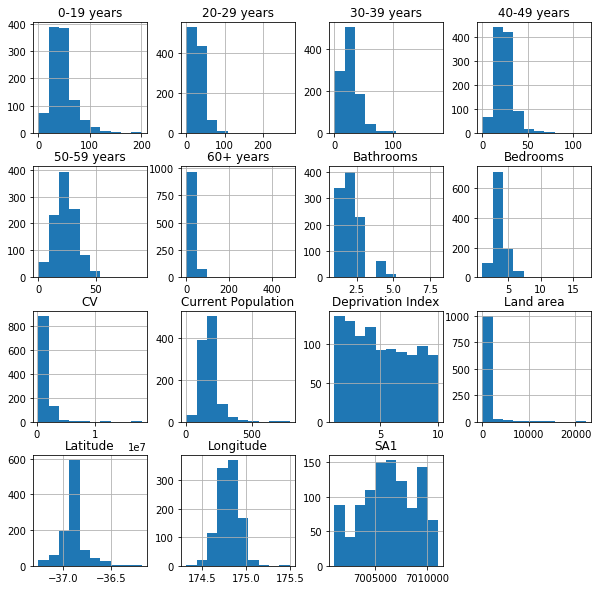

In [30]:
#Look at the distribution in the dataset by using the inbuilt histogram function in pandas in the matplotlib.
dataframe.hist(figsize = (10,10))

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


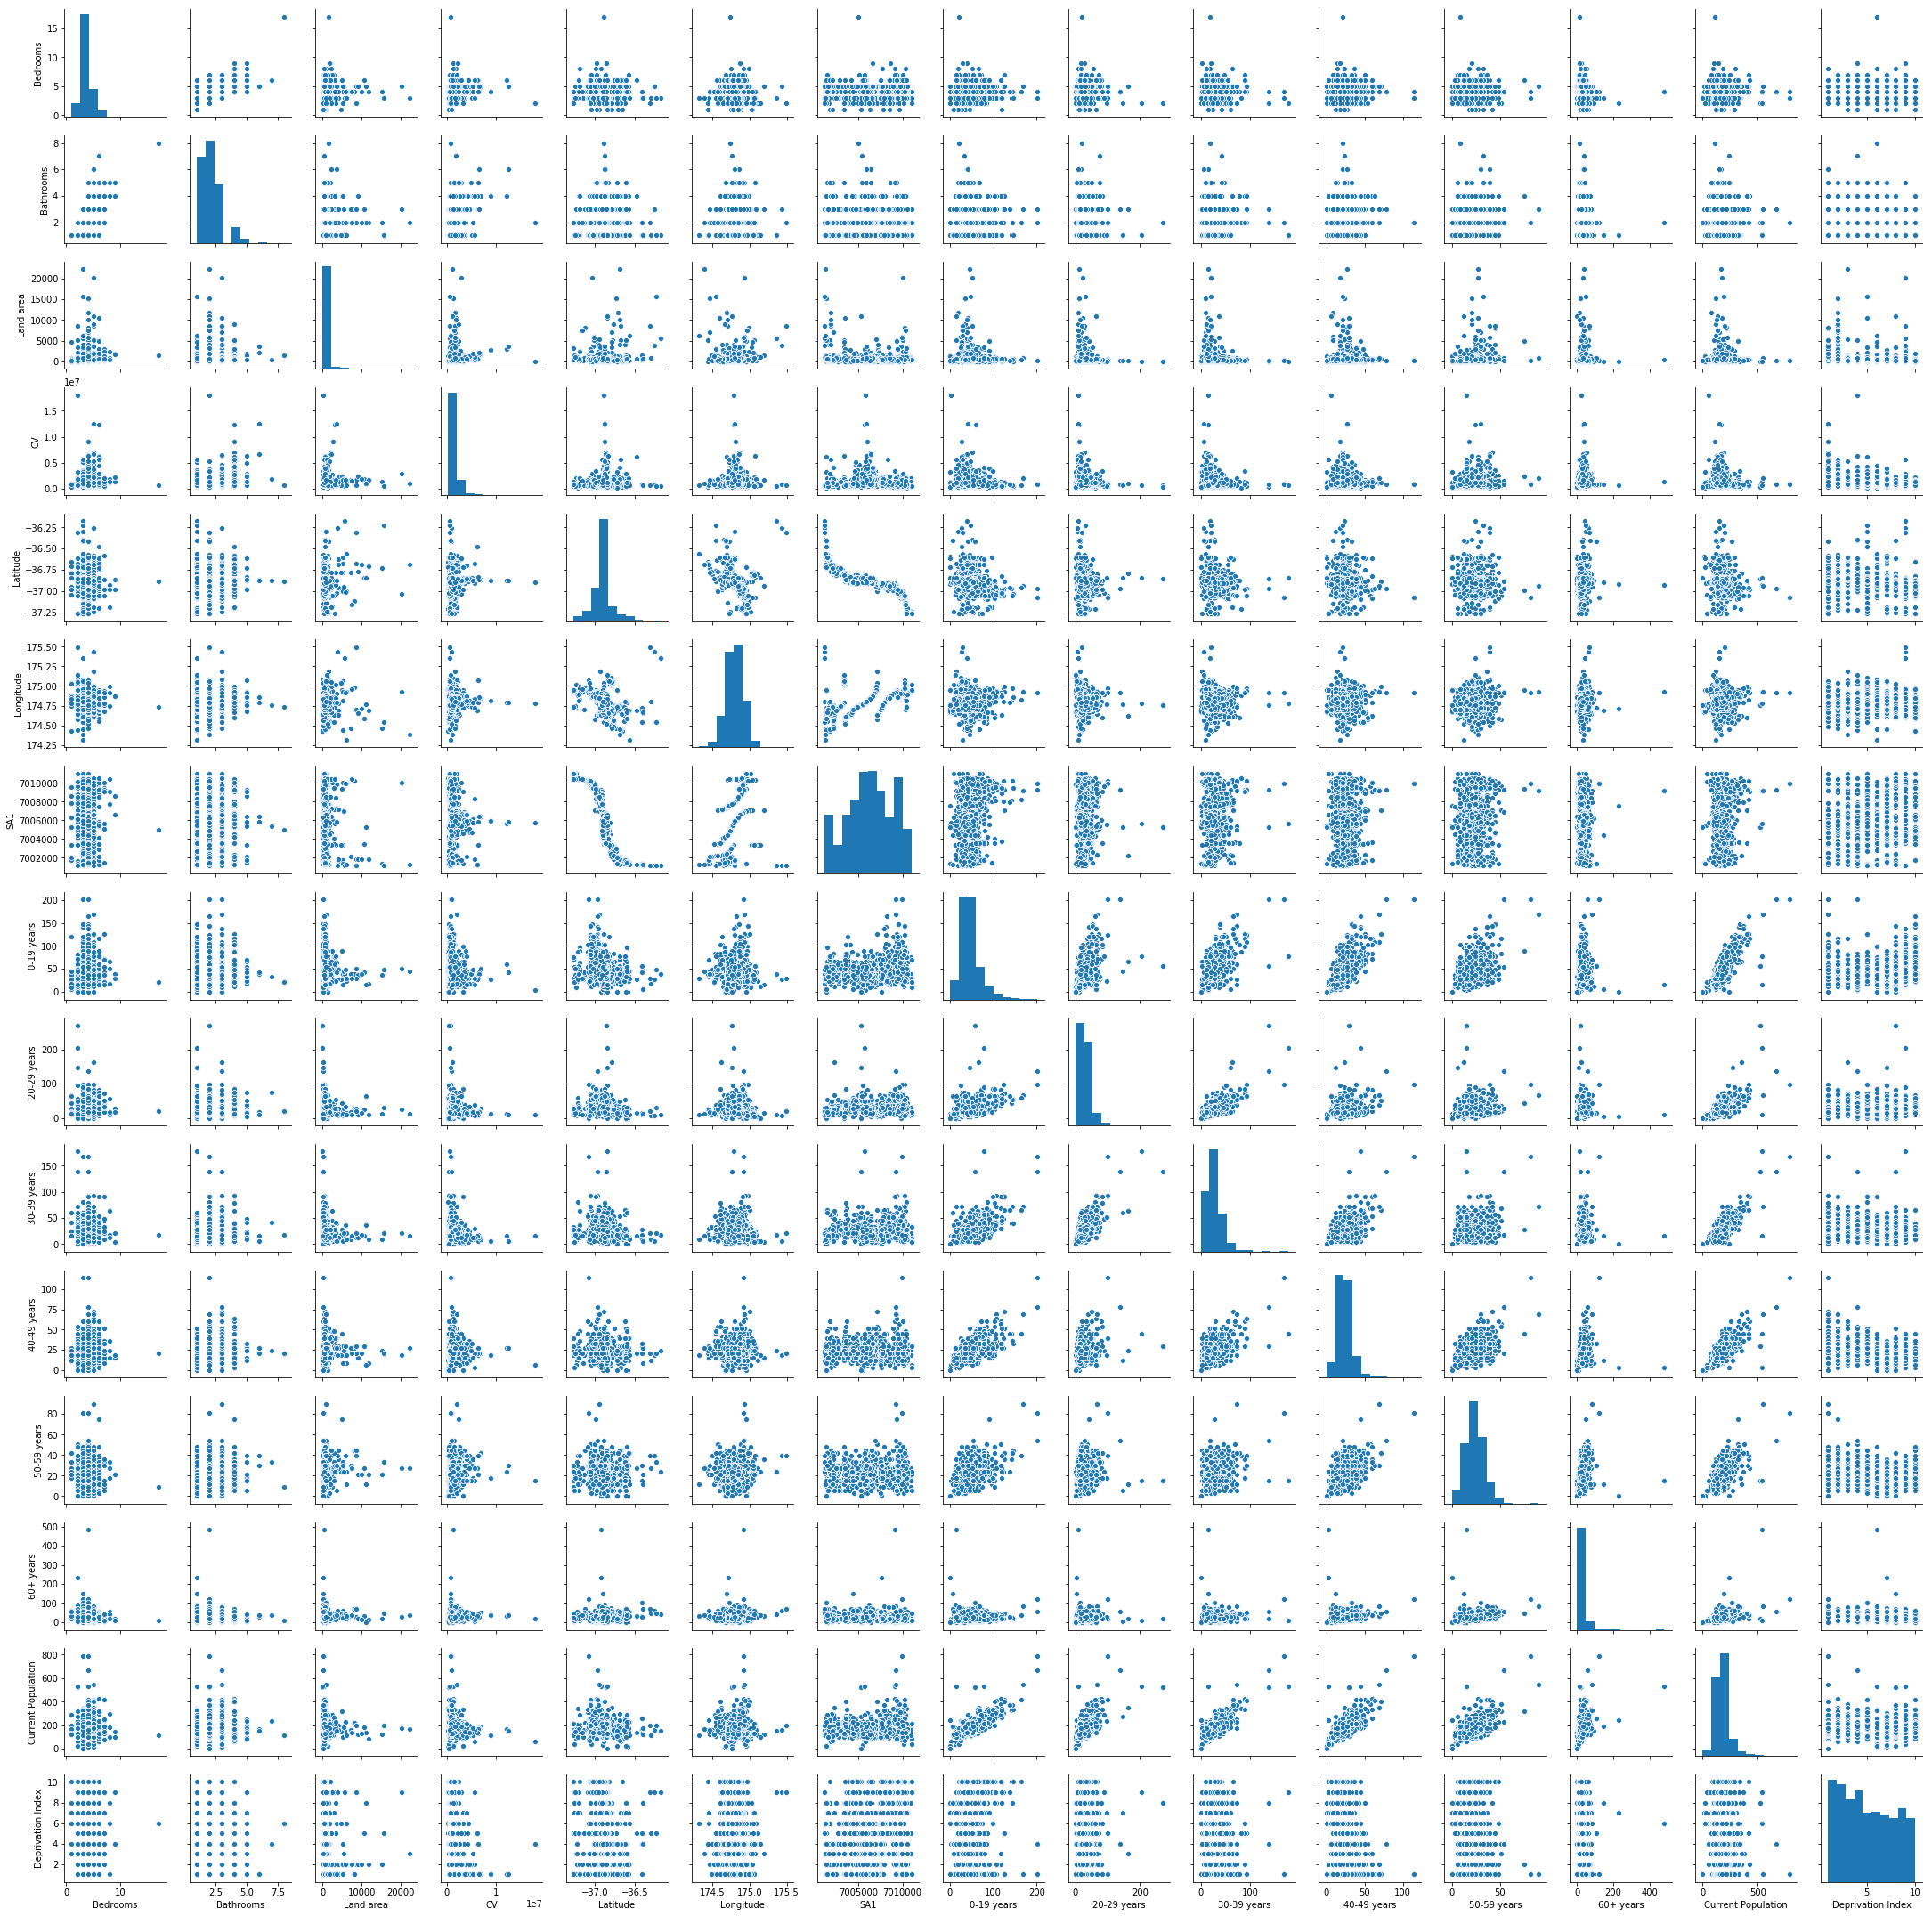

In [31]:
#Check the relationship
sns.pairplot(dataframe, size = 2.0)

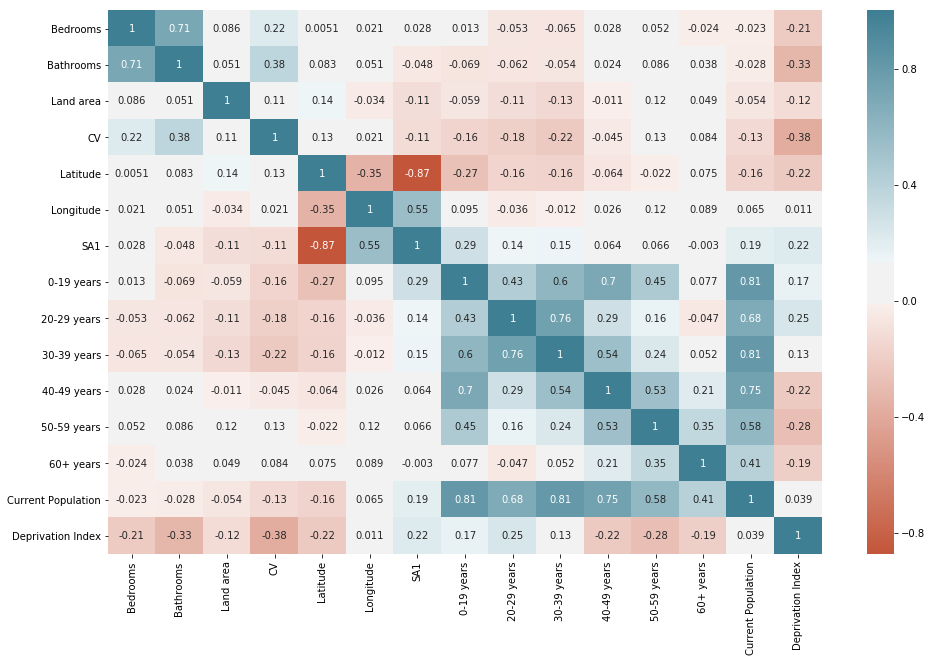

In [32]:
ax, fig = plt.subplots(figsize=(16,10))
correlation_matrix = dataframe.corr()
x = arange(25).reshape(5,5)

#Creating my own color palette
cmap = sns.diverging_palette(20, 220, sep=20, as_cmap=True)
sns.heatmap(correlation_matrix, annot=True, cmap=cmap)

#Display the plot
plt.show()

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


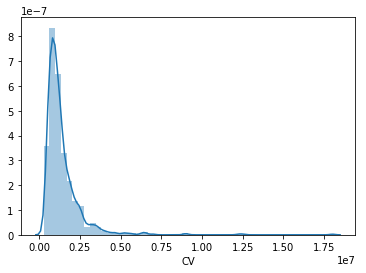

In [33]:
#Look at the distribution of a Capital Value (CV)
sns.distplot(dataframe['CV'])

The data is skewed to the right, which means that the mean is greater than the median. The tail seems quite long as well. As there is no clear center point, we cannote accurately generalise the data

### Creating a Machine Learning Model

In [34]:
#We need to divide dataset into a training and testing set
from sklearn.model_selection import train_test_split

Group 'Suburb' column and take the mean, and replace the Suburb column with the mean of the Capital Value per suburb.

In [35]:
dataframe['Suburbs'] = dataframe.groupby('Suburbs', as_index = False)['CV'].transform('mean')

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [36]:
dataframe.head()

,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs,Current Population,Deprivation Index
0,5,3.0,"106 Lawrence Crescent Hill Park, Auckland",714,960000,-37.012920,174.904069,7009770,48,27,24,21,24,21,7.373684e+05,174,6.0
1,5,3.0,"8 Corsica Way Karaka, Auckland",564,1250000,-37.063672,174.922912,7009991,42,18,12,21,15,30,1.282143e+06,129,1.0
2,6,4.0,"243 Harbourside Drive Karaka, Auckland",626,1250000,-37.063580,174.924044,7009991,42,18,12,21,15,30,1.282143e+06,129,1.0
3,2,1.0,"2/30 Hardington Street Onehunga, Auckland",65,740000,-36.912996,174.787425,7007871,42,6,21,21,12,15,1.090714e+06,120,2.0
4,3,1.0,"59 Israel Avenue Clover Park, Auckland",601,630000,-36.979037,174.892612,7008902,93,27,33,30,21,33,6.283333e+05,231,9.0


In [37]:
#Remove the following columns
#CV because it will be used as the dependent variable
#The rest because I don't think they will be necessary.

x = dataframe.drop(['CV', 'Latitude', 'Longitude', 'SA1', 'Address'], axis = 1)
x.head()

,Bedrooms,Bathrooms,Land area,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs,Current Population,Deprivation Index
0,5,3.0,714,48,27,24,21,24,21,7.373684e+05,174,6.0
1,5,3.0,564,42,18,12,21,15,30,1.282143e+06,129,1.0
2,6,4.0,626,42,18,12,21,15,30,1.282143e+06,129,1.0
3,2,1.0,65,42,6,21,21,12,15,1.090714e+06,120,2.0
4,3,1.0,601,93,27,33,30,21,33,6.283333e+05,231,9.0


In [38]:
#Make y the Capital Value (CV)
y = dataframe['CV']
y.head()

0     960000
1    1250000
2    1250000
3     740000
4     630000
Name: CV, dtype: int64

In [39]:
#Do the train_test_split
#Using 30% of the data as the test set.
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [40]:
from sklearn.linear_model import LinearRegression

#create the linear regression model
model = LinearRegression()

In [41]:
#Machine learning models can only work on numeric data, hence, we need to drop the non-numeric data.
model.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [42]:
#These are the m or the gradient from the data.
model.coef_

array([-4.19328036e+04,  3.03684464e+05,  6.74680702e+01,  7.37570948e+02,
       -9.27971300e+02, -9.84523972e+03, -9.23159952e+03,  2.54606676e+03,
       -2.47496718e+03,  8.48286189e-01,  3.13179197e+03, -1.33088756e+04])

In [43]:
#After training the model, we can use this to predict the test dataset.
predicted = model.predict(test_x)
predicted

array([ 969382.00973171,  464936.68831387, 1445091.64547996,
       1739488.19782319, 2357980.94211276, 1142299.08535196,
       1176930.27618141,  566092.40707383, 1691712.56406707,
        817623.31166274, 2880767.97744747,  559163.23568131,
       1359147.32548593,  885611.0737217 ,  696015.4642597 ,
       1376514.9144929 , 1757541.92748968,  691098.7383758 ,
       1969628.83322134, 3095509.18186995,  771415.75629326,
       1478588.31667848,  581491.71127869, 1753793.73799837,
       1117462.06556932, 2347381.09039046, 1997983.1282115 ,
        371277.71638823, 1428784.94314254, 3497146.26877277,
       1153177.22678544, 2901411.92060835,  546465.19870246,
       1161468.09589207, 1115683.15542703,  873540.69581128,
        615916.84518874, 2529115.67637389,  976534.79970547,
       2874268.64798717,  744519.00209873, 1433572.4903965 ,
        602037.00581668, 2449672.39435155, 1816960.16906859,
       1050477.31906531, 1305612.01498651, 1075286.88853158,
       1493683.9588655 ,

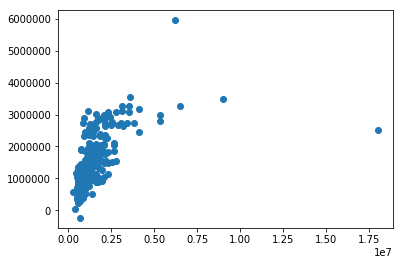

In [44]:
#Plot the predicted and the test_y and the predicted
plt.scatter(test_y, predicted)

In [45]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))
    
regression_results(test_y, predicted)

explained_variance:  0.3373
r2:  0.3372
MAE:  449227.0637
MSE:  1189041826570.668
RMSE:  1090431.945


The scatterplot shows a weak positive linear relationship along with a couple of outliers that could be influential in terms of the skewness of the data.

In [46]:
#The multiple R squared of the model.
model.score(test_x, test_y)

0.3372471689125286

As expected, the multiple R squared shows that 33.72% of the variation of the Capital Value is explained by the model.

## Trying out other models: 

#### Decision Tree

Following similar steps to the linear regression model:

In [47]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO 
from IPython.display import Image 
from pydot import graph_from_dot_data
import pandas as pd
import numpy as np

In [48]:
#Since decision trees can handle categorical data, we will only drop the CV column.
xdt = dataframe.drop(['CV', 'Latitude', 'Longitude', 'SA1', 'Address'], axis = 1)
ydt = dataframe['CV']

In [49]:
#Splitting the data into 30% testing set and 70% training set.
xdt_train, xdt_test, ydt_train, ydt_test = train_test_split(xdt, ydt, test_size = 0.3, random_state=1)

In [50]:
dt = DecisionTreeClassifier()
dt.fit(xdt_train, ydt_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [51]:
ydt_pred = dt.predict(xdt_test)
ydt_pred

array([ 770000,  850000,  750000,  990000, 1050000, 1180000,  510000,
       1175000, 2675000,  630000, 1230000, 1100000,  980000,  920000,
       1425000, 3275000, 1060000,  960000, 1600000,  880000,  830000,
        680000,  600000, 1900000, 1020000,  830000,  890000,  980000,
       1400000, 1700000, 1650000, 1675000, 2250000, 1400000, 3500000,
       1875000,  700000,  640000,  990000, 4650000,  980000, 2075000,
        880000, 1380000,  940000, 2300000,  990000,  485000, 1150000,
       1325000,  760000, 2450000,  840000, 2200000, 3550000, 1500000,
       2100000, 2525000, 1690000, 1360000, 1325000,  840000, 1350000,
       1450000, 1260000, 1370000,  670000,  850000, 1195000,  640000,
       1550000, 1600000, 1700000,  390000,  550000,  540000, 1500000,
       1005000,  490000,  500000,  950000, 1950000, 1230000,  950000,
        580000,  960000, 1300000, 1870000,  540000,  860000,  840000,
       2750000, 2025000, 1745000,  880000,  980000,  680000,  880000,
       1180000, 1180

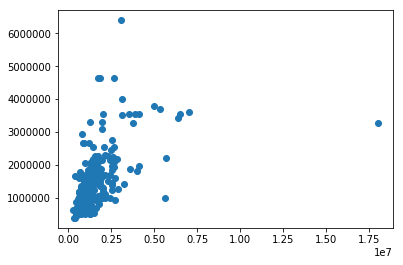

In [52]:
plt.scatter(ydt_test, ydt_pred)

In [53]:
#Evaluate the model
dt.score(xdt_test, ydt_test)

0.031746031746031744

The classification rate is 3.17% which is pretty low.

#### Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
#explanatory variables
xrf = dataframe.drop(['CV', 'Latitude', 'Longitude', 'SA1', 'Address'], axis = 1)

#value we want to predict
yrf = dataframe['CV']

xrf_list = list(xrf.columns)

#features are X
#labels are Y
#Split the data into training and testing sets
train_xrf, test_xrf, train_yrf, test_yrf = train_test_split(xrf, yrf, test_size = 0.3, random_state = 1)

In [56]:
print('Training X Shape:', train_xrf.shape)
print('Training Y Shape:', train_yrf.shape)
print('Testing X Shape:', test_xrf.shape)
print('Testing Y Shape:', test_yrf.shape)

Training X Shape: (733, 12)
Training Y Shape: (733,)
Testing X Shape: (315, 12)
Testing Y Shape: (315,)


In [57]:
#Train Model
from sklearn.ensemble import RandomForestRegressor

#Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 1)

#Train the model on training data
rf.fit(train_xrf, train_yrf)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [58]:
#Use the forest's predict metod on the test data
rfPredictions = rf.predict(test_xrf)

#calculate the absolute errors
errors = abs(rfPredictions - test_yrf)

#Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 419382.68


The average estimate of the Capital Value is off by 419382.68.

In [59]:
#Determine Performance Metrics

#Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_yrf)

#Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round (accuracy, 2), '%.')

Accuracy: 72.61 %.


The model has learned how to predict the maximum Capital Value  with 72.61% of accuracy.

In [60]:
#Finding the best model using Root Square Mean Error Prediction (RMSEP)
from sklearn.metrics import mean_squared_error
from math import sqrt

y_true = test_y.as_matrix()

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [61]:
#Linear Regression
y_pred_lr = predicted
mse_lr = mean_squared_error(y_true, y_pred_lr)
rmse_lr = sqrt(mse_lr)
rmse_lr

1090431.9449514803

In [62]:
#Decision Trees
y_pred_dt = ydt_pred
mse_dt = mean_squared_error(y_true, y_pred_dt)
rmse_dt = sqrt(mse_dt)
rmse_dt

1611686.9600337583

In [63]:
#Random Forest
y_pred_rf = rfPredictions
mse_rf = mean_squared_error(y_true, y_pred_rf)
rmse_rf = sqrt(mse_rf)
rmse_rf

1537645.7457811064

The model with the lowest RMSEP is the Linear Regression, making it the best model of the three used.